In [45]:
## =========== Part 1: Loading and Visualizing Data =============
from __future__ import print_function

import scipy.io
import numpy as np
import matplotlib.pyplot as plt

mat = scipy.io.loadmat('./data/ex5data1.mat')

X = mat['X']
y = mat['y']

Xval = mat["Xval"]
yval = mat["yval"]
Xtest = mat["Xtest"]
ytest = mat["ytest"]

# size of the dataset
m = X.shape[0]

In [46]:
class LinearRegression(object):
    def __init__(self, n_iters=200):
        self.n_iters = n_iters
        
    def fit(self, X, y, theta, lambda_val):
        m = len(y) 
    
        theta = np.reshape(theta, (-1,y.shape[1]))
        J = 0
        grad = np.zeros(theta.shape)

        # cost function
        J = ( 1./(2*m)) * np.power( (np.dot(X, theta) - y) , 2).sum() + ( float(lambda_val) / (2*m)) * np.power(theta[1:theta.shape[0]],2).sum()

        # regularized gradient
        grad = (1./m) * np.dot( X.T, np.dot(X,theta) - y) + ( float(lambda_val) / m )*theta

        # unregularize first gradient
        grad_no_regularization = (1./m) * np.dot( X.T, np.dot(X,theta) - y)
        grad[0] = grad_no_regularization[0]
            
        return J, grad.flatten()
    
    def transform(self,X, y, lambda_val):
   
        # Initialize Theta
        initial_theta = np.zeros((X.shape[1], 1))

        # Short hand for cost function to be minimized
        def costFunc(theta):
            return lr.fit(X, y, theta, lambda_val)

        # Now, costFunction is a function that takes in only one argument
        maxiter = 200
        results = minimize(costFunc, x0=initial_theta, options={'disp': True, 'maxiter':maxiter}, method="L-BFGS-B", jac=True)

        theta = results["x"]
        return theta
    
    def predict(self, X, theta):
        # calculate dot product of test set with learned parameters       
        return np.dot(X, theta)

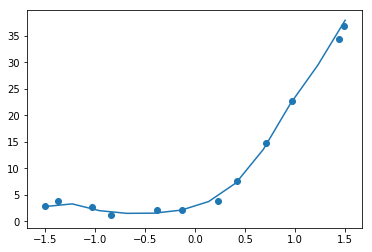

In [53]:
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

sc = StandardScaler()
X_std = sc.fit_transform(X)

pp = PolynomialFeatures(degree=11)
X_poly = pp.fit_transform(X_std)

# Initialize Theta
theta = np.ones((X_poly.shape[1], 1))

lr = LinearRegression()
lr.fit(X_poly, y, theta, 0.01)

# Train linear regression with lambda = 0
theta = lr.transform(X_poly, y, 0.01)
X_test = np.linspace(-1.5, 1.5, 12)

X_test_std = sc.fit_transform(X_test[:, np.newaxis])
X_test_poly = pp.fit_transform(X_test[:, np.newaxis])

# Plot outputs 
plt.plot(X_test, lr.predict(X_test_poly, theta), label="Model")
plt.scatter(X_std, y, label="Samples")
plt.show()

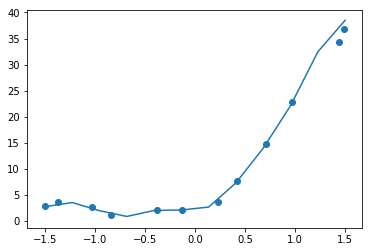

In [43]:
# Polynomial regression with sklearn

from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

sc = StandardScaler()
X_std = sc.fit_transform(X)

pp = PolynomialFeatures(degree=11)
X_poly = pp.fit_transform(X_std)

# Initialize Theta
theta = np.ones((X_poly.shape[1], 1))

lr = LinearRegression()
lr.fit(X_poly, y)

# Train linear regression with lambda = 0
# theta = lr.transform(X_poly, y)
X_test = np.linspace(-1.5, 1.5, 12)

X_test_std = sc.fit_transform(X_test[:, np.newaxis])
X_test_poly = pp.fit_transform(X_test[:, np.newaxis])

# Plot outputs 
plt.plot(X_test, lr.predict(X_test_poly), label="Model")
plt.scatter(X_std, y, label="Samples")
plt.show()

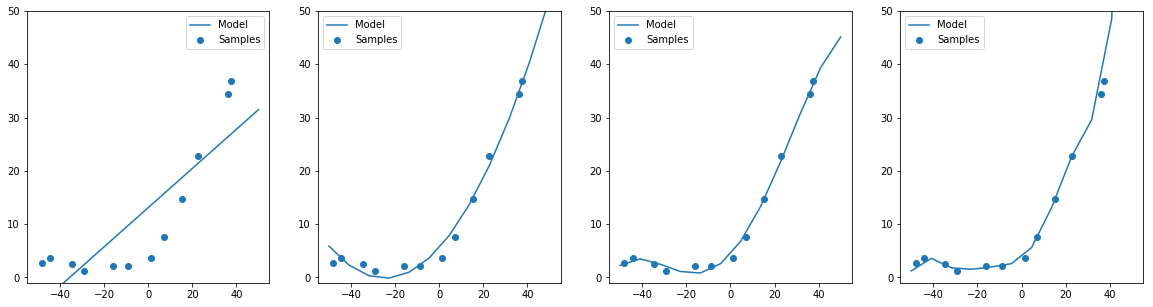

In [77]:
# Polynomial regression with sklearn pipeline concept

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

degrees = [1, 2, 4, 8]
plt.figure(figsize=(20, 5))

for i in range(len(degrees)):
    # Create a subplot    
    plt.subplot(1, len(degrees), i + 1)

    # Standardize features
    standardize_feature = StandardScaler()

    # Polynomial degree of features
    polynomial_features = PolynomialFeatures(degree=degrees[i],include_bias=False)

    # Model selection
    linear_regression = LinearRegression()

    # Creating a pipeline
    # 1) Standardize features into normal form (mu = 0, std = 1)
    # 2) Convert into n degree polynomial
    # 3) Apply Linear regression model

    pipeline = Pipeline([("Standardize features", standardize_feature),
                        ("Polynomial features", polynomial_features),
                        ("Linear regression", linear_regression)])

    # Fit data into pipeline
    pipeline.fit(X, y)

    # K-fold validation samples
    scores = cross_val_score(pipeline, X, y, scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(-50, 50, 12)

    # Plot outputs 
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.scatter(X, y, label="Samples")
    plt.legend(loc="best")
    plt.ylim((-1, 50))
    
plt.show()